# Touring Times of Graphs

In [10]:
# Here are the necessary imports

# tour_graph is a module I wrote in Cython to run a fast tour simulation
from tour_graph import tour_graph as tg
# networkx for easy creation and manipulation of graphs and networks
import networkx as nx
import itertools as it
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Creating Graphs

[NetworkX](https://networkx.github.io/) makes it very to create and manipualte graphs and networks of any size and shape.

We will begin by creating a comlete graph with 5 nodes.

In [9]:
# create the graph
g_1 = nx.Graph()

In [11]:
# add the edges, which also creates the nodes if they don't already exist
g_1.add_edges_from(it.combinations(range(5),2))

## Visualizing Graphs

NetowrkX provides many built in visualization tools which run off of matplotlib.

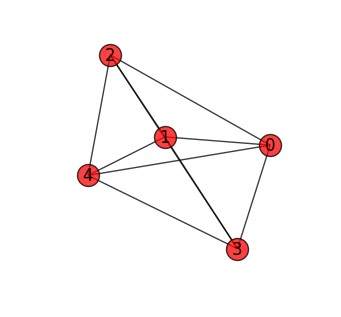

In [43]:
fig_1, ax_1 = plt.subplots(figsize=(3.5,3.5))
nx.draw(g_1, ax=ax_1, node_size=250, with_labels=True, alpha=0.75)

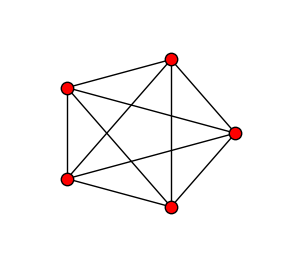

In [32]:
fig_2, ax_2 = plt.subplots(figsize=(3,3))
nx.draw_circular(g_1, ax=ax_2, node_size=80)

## Going For a Tour!

We will take a tour of this graph. This tour will begin at node 0 then walk to an adjacent (connected) node. After each stop on the tour the next node to be visited will be chosen randomly from the adjacent nodes. Adjacent nodes all have an equal probability of being selected because this is an unweighted graph. We will stop the tour when all nodes have been visited.

In [ ]:
tg.tour_graph()